<a href="https://colab.research.google.com/github/Wojciech512/algorytm-wieloklasowy-przewidywanie-preferencji-cieplnych-u-ytkownika/blob/main/PBL_worksprace_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#importowanie pliku csv
from google.colab import drive
drive.mount('/content/drive')
#tworzenie dataframe'a z pliku csv
import pandas as pd
path="/content/datapbl.csv"
df=pd.read_csv(path, sep=";")
df_raw=pd.DataFrame(data=df)
df_raw

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Data,RH,TA,TSK,ID,TS,A_TS,PF_TS,A_AM,PF_AM,...,MS,SK,KR,D,MSD,MLA,MDA,MBA,KZA,PS
0,44194.33361,46.4,20.0,36.162,1,0,0,0.0,0,0,...,360.0,2303,9366,7.69,676,165,8,30,896,49.0
1,44194.50028,43.7,21.0,32.168,1,0,0,0.0,0,-1,...,NaN,2303,9366,7.69,676,165,8,30,896,88.0
2,44194.66694,46.5,20.8,31.232,1,0,0,0.0,0,0,...,NaN,2303,9366,7.69,676,165,8,30,896,70.0
3,44194.83361,43.7,21.1,35.413,1,0,0,0.0,0,-1,...,NaN,2303,9366,7.69,676,165,8,30,896,62.0
4,44195.33361,48.0,19.8,35.101,1,0,0,0.0,0,0,...,411.0,2329,7616,5.87,437,285,0,0,1005,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,44387.83451,61.5,22.9,33.940,2,0,0,0.0,1,0,...,NaN,3772,21677,16.22,400,399,38,87,2565,63.0
860,44388.33451,58.1,24.0,32.505,2,1,0,0.0,1,0,...,282.0,3131,11513,8.63,703,320,75,2,1798,102.0
861,44388.50118,63.3,25.0,34.065,2,2,0,-1.0,0,1,...,NaN,3131,11513,8.63,703,320,75,2,1798,63.0
862,44388.66785,62.5,24.9,32.942,2,1,1,0.0,1,0,...,NaN,3131,11513,8.63,703,320,75,2,1798,69.0


In [16]:
#Opis danych
# Badania długotrwałe 2 osób okres 2,5 miesiąca, od końca grudnia 2020 do połowy marca 2021

# RH	wilgotność względna (relative humidity), pomiary ciągłe
# TA	temperatura powietrza (air temperature), pomiary ciągłe
# TSK	temperatura skóry (skin temperature), pomiary ciągłe
# ID	numer identyfikacyjny
# 	1: kobieta, 59 lat, 165 cm, brak wagi
# 	2: mężczyzna, 59 lat, 180 cm, brak wagi
# TS	odczucia cieplne (thermal sensation)
# 	-3 – zimno (cold)
# 	-2 – chłodno (cool)
# 	-1 – dość chłodno (slightly cool)
# 	0 – neutralnie (neutral)
# 	+1 – dość ciepło (slightly warm)
# 	+2 – ciepło (warm)
# 	+3 – gorąco (hot)
# A_TS	akceptowalność odczuć cieplnych (thermal sensation acceptability)
# 	-2 – bardzo nieakceptowalne (very unacceptable)
# 	-1 – dość nieakceptowalne (slightly unacceptable)
# 	0 – neutralne (neutral)
# 	+1 – dość akceptowalne (slightly acceptable)
# 	+2 – bardzo akceptowalne (very acceptable)
#  PS	puls

In [17]:
#usuwanie zbędnych kolumn df_raw i analiza zawartości
df_main=df_raw.copy() 
#https://bulldogjob.pl/readme/8-sposobow-na-przeksztalcenie-dataframe-w-pandas-przyklady
df_main.drop(["A_TS","Data","PF_TS","A_AM","PF_AM","F_S","F_C","F_P","CP","MS","SK","KR","D","MSD","MLA","MDA","MBA","KZA"],axis=1,inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RH      864 non-null    float64
 1   TA      864 non-null    float64
 2   TSK     864 non-null    float64
 3   ID      864 non-null    int64  
 4   TS      864 non-null    int64  
 5   PS      835 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 40.6 KB


In [18]:
#zamiana wartości NaN w df_main na mediane PS
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
imputer.fit_transform(df_main[['PS']])
df_main['PS']=imputer.transform(df_main[['PS']])
print(f"median value: {imputer.statistics_}")
df_main

median value: [74.]


,RH,TA,TSK,ID,TS,PS
0,46.4,20.0,36.162,1,0,49.0
1,43.7,21.0,32.168,1,0,88.0
2,46.5,20.8,31.232,1,0,70.0
3,43.7,21.1,35.413,1,0,62.0
4,48.0,19.8,35.101,1,0,76.0
...,...,...,...,...,...,...
859,61.5,22.9,33.940,2,0,63.0
860,58.1,24.0,32.505,2,1,102.0
861,63.3,25.0,34.065,2,2,63.0
862,62.5,24.9,32.942,2,1,69.0


In [19]:
#potwierdzenie niwelacji nan w df_main
df_main_sum_form_isnull=df_main.isnull().sum()
# ile % to brak danych
df_main_mean_form_isnull=df_main.isnull().sum()/len(df_main)

print(f"sum:\n{df_main_sum_form_isnull}")
print("================")
print(f"mean:\n{df_main_mean_form_isnull}")

sum:
RH     0
TA     0
TSK    0
ID     0
TS     0
PS     0
dtype: int64
mean:
RH     0.0
TA     0.0
TSK    0.0
ID     0.0
TS     0.0
PS     0.0
dtype: float64


In [20]:
#standaryzacja danych [["RH",	"TA",	"TSK","PS"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df_main[["RH","TA",	"TSK","PS"]]=scaler.fit_transform(df_main[["RH","TA",	"TSK","PS"]])

#df_main, tworzenie zbiorów testowych i uczących (70%:30%)
df_main_learn=df_main.loc["0":"648"] 
df_main_test=df_main.loc["649":]
#sprawdzenie czy dane się zgadzają
print(df_main.head())
print(df_main_learn.head())

print(df_main_test.head())
print(df_main_test)

         RH        TA       TSK  ID  TS        PS
0  0.230386 -0.350084  1.713382   1   0 -2.248624
1 -0.045227 -0.024179 -0.419126   1   0  0.927235
2  0.240594 -0.089360 -0.918883   1   0 -0.538546
3 -0.045227  0.008412  1.313470   1   0 -1.190004
4  0.393712 -0.415265  1.146885   1   0 -0.049953
         RH        TA       TSK  ID  TS        PS
0  0.230386 -0.350084  1.713382   1   0 -2.248624
1 -0.045227 -0.024179 -0.419126   1   0  0.927235
2  0.240594 -0.089360 -0.918883   1   0 -0.538546
3 -0.045227  0.008412  1.313470   1   0 -1.190004
4  0.393712 -0.415265  1.146885   1   0 -0.049953
           RH        TA       TSK  ID  TS        PS
649 -0.351463  0.138774  0.142566   2   0 -0.782843
650 -0.055434  0.008412 -0.524310   2   0 -0.782843
651 -0.361670 -0.121950 -1.458150   2   0  0.112912
652 -1.484536 -0.121950 -0.657792   2  -1 -0.701411
653 -1.515159  0.529860 -1.591632   2   0 -1.678598
           RH        TA       TSK  ID  TS        PS
649 -0.351463  0.138774  0.142566   

In [21]:
#tworzenie tabeli wyników learn i test (jeżeli wyjdzie error to dlatego że po pierwszym uruchomieniu już TS nie ma w tabeli ale wszystko działa)
df_main_learn_target=df_main_learn.pop("TS")
df_main_test_target=df_main_test.pop('TS')
print(df_main_learn_target)
print(df_main_test_target)
#określenie klas klasyfikatora
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# df_main_learn['TS']= encoder.fit_transform(df_main_learn_target)
encoder.fit_transform(df_main_learn_target)
print(encoder.classes_)
print(df_main_learn)

0      0
1      0
2      0
3      0
4      0
      ..
644    0
645    0
646   -1
647    0
648    0
Name: TS, Length: 649, dtype: int64
649    0
650    0
651    0
652   -1
653    0
      ..
859    0
860    1
861    2
862    1
863    0
Name: TS, Length: 215, dtype: int64
[-2 -1  0  1  2  3]
           RH        TA       TSK  ID        PS
0    0.230386 -0.350084  1.713382   1 -2.248624
1   -0.045227 -0.024179 -0.419126   1  0.927235
2    0.240594 -0.089360 -0.918883   1 -0.538546
3   -0.045227  0.008412  1.313470   1 -1.190004
4    0.393712 -0.415265  1.146885   1 -0.049953
..        ...       ...       ...  ..       ...
644 -0.065642 -0.187131 -0.123864   2  0.194344
645 -0.749569 -0.154541 -1.391409   2  1.334396
646 -0.637283 -0.415265  0.042722   2 -0.049953
647 -0.688322 -0.056769  0.909287   2 -0.538546
648 -0.371878 -0.675989  1.642904   2  1.252964

[649 rows x 5 columns]


In [22]:
# #importing packages
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# df_main_copy_for_cfm=df_main.copy()
# #Importing of dataset to dataframe.
# #To see first 5 rows of the dataset
# df_main_copy_for_cfm.head()
# #To know the data types of the variables.
# df_main_copy_for_cfm.dtypes
# #Speceis is the output class,to know the count of each class we use value_counts()
# df_main_copy_for_cfm['TS'].value_counts()
# #Separating independant variable and dependent variable("Species")
# X = df_main_copy_for_cfm.drop(['TS'], axis=1)
# y = df_main_copy_for_cfm['TS']
# # print(X.head())
# print(X.shape)
# # print(y.head())
# print(y.shape)
# # Splitting the dataset to Train and test
# from sklearn.model_selection import train_test_split
# X_train_cfm, X_test_cfm, y_train_cfm, y_test_cfm = train_test_split(X, y, test_size=0.3, random_state=0)
# #to know the shape of the train and test dataset.
# print(X_train_cfm.shape)
# print(y_train_cfm.shape)
# print(X_test_cfm.shape)
# print(y_test_cfm.shape)
# #We use Support Vector classifier as a classifier
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix
# #training the classifier using X_Train and y_train 
# clf_cfm = SVC(kernel = 'linear').fit(X_train_cfm,y_train_cfm)
# clf_cfm.predict(X_train_cfm)
# #Testing the model using X_test and storing the output in y_pred
# y_pred = clf_cfm.predict(X_test_cfm)
# # Creating  a confusion matrix,which compares the y_test and y_pred
# cm = confusion_matrix(y_test_cfm, y_pred)
# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
# cm_df = pd.DataFrame(cm,
#                      index = ['-2' '-1'  '0'  '1'  '2'  '3'], 
#                      columns = ['-2' '-1'  '0'  '1'  '2'  '3'])
# #Plotting the confusion matrix
# plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

In [23]:
#uczenie 
# from sklearn.ensemble import RandomForestClassifier
# model_RandomForestClassifier = RandomForestClassifier(bootstrap: True,
# 'criterion': 'mse',
# 'max_depth': None,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'min_impurity_decrease': 0.0,
# 'min_impurity_split': None,
# 'min_samples_leaf': 1,
# 'min_samples_split': 2,
# 'min_weight_fraction_leaf': 0.0,
# 'n_estimators': 10,
# 'n_jobs': 1,
# 'oob_score': False,
# 'random_state': 42,
# 'verbose': 0,
# 'warm_start': False)
# model_RandomForestClassifier.fit(df_main_learn, df_main_learn_target)
# #model_RandomForestClassifier.fit(df_main_test_target,df_main_test_target)

#testowanie
# model_RandomForestClassifier_test=model_RandomForestClassifier.score(df_main_test,df_main_test_target)
# print(model_RandomForestClassifier_test)

In [24]:
#Model learning
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

n_classes=len(set(df_main_learn_target))
Y=label_binarize(df_main_learn_target, classes=[*range(n_classes)])

#https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431
X_train, X_test, y_train, y_test = train_test_split(df_main_learn,Y, random_state = 42)
random_forest_declaration=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=3,random_state=42,bootstrap=True)

random_forest_declaration.fit(X_train, y_train)
score=random_forest_declaration.score(X_test, y_test)
print(f"Model precision: {score}")

clf = OneVsRestClassifier(random_forest_declaration)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

#For UserWarning: https://stackoverflow.com/questions/42821315/userwarning-label-not-number-is-present-in-all-training-examples
#https://stackoverflow.com/questions/34561554/scikit-learn-label-not-x-is-present-in-all-training-examples/34561760#34561760
#The warning means that some of your classes are missing from the training data.

Model precision: 0.7055214723926381


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


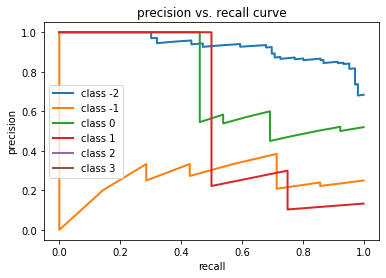

In [25]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],y_score[:, i])
    #sprawdzić czy legenda zgadza się z przedstawionymi danymu
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(encoder.classes_[i])) 
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [33]:
from sklearn.metrics import f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_none=f1_score(y_test,maxVar_df_copy, average=None)
print(f1_score_none)

f1_score_micro=f1_score(y_test,maxVar_df_copy, average='micro')
print(f1_score_micro)

f1_score_macro=f1_score(y_test,maxVar_df_copy, average='macro',zero_division="warn")#error związany z podziałem na treningowy i uczący, jeden z nich nie zawiwera klasy co przyczynia się do nie znajdywania żadnej klasy
print(f1_score_macro)

f1_score_weighted=f1_score(y_test,maxVar_df_copy, average='weighted',zero_division="warn") #error
print(f1_score_weighted)

f1_score_samples=f1_score(y_test,maxVar_df_copy, average='samples')
print(f1_score_samples)

[0.84552846 0.         0.66666667 0.         0.         0.        ]
0.7918088737201365
0.25203252032520324
0.7560975609756098
0.7116564417177914


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


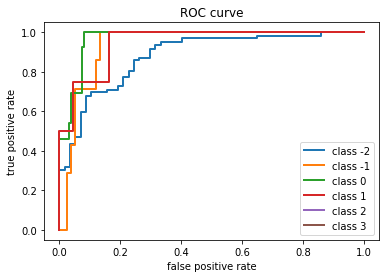

In [27]:
#roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(encoder.classes_[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

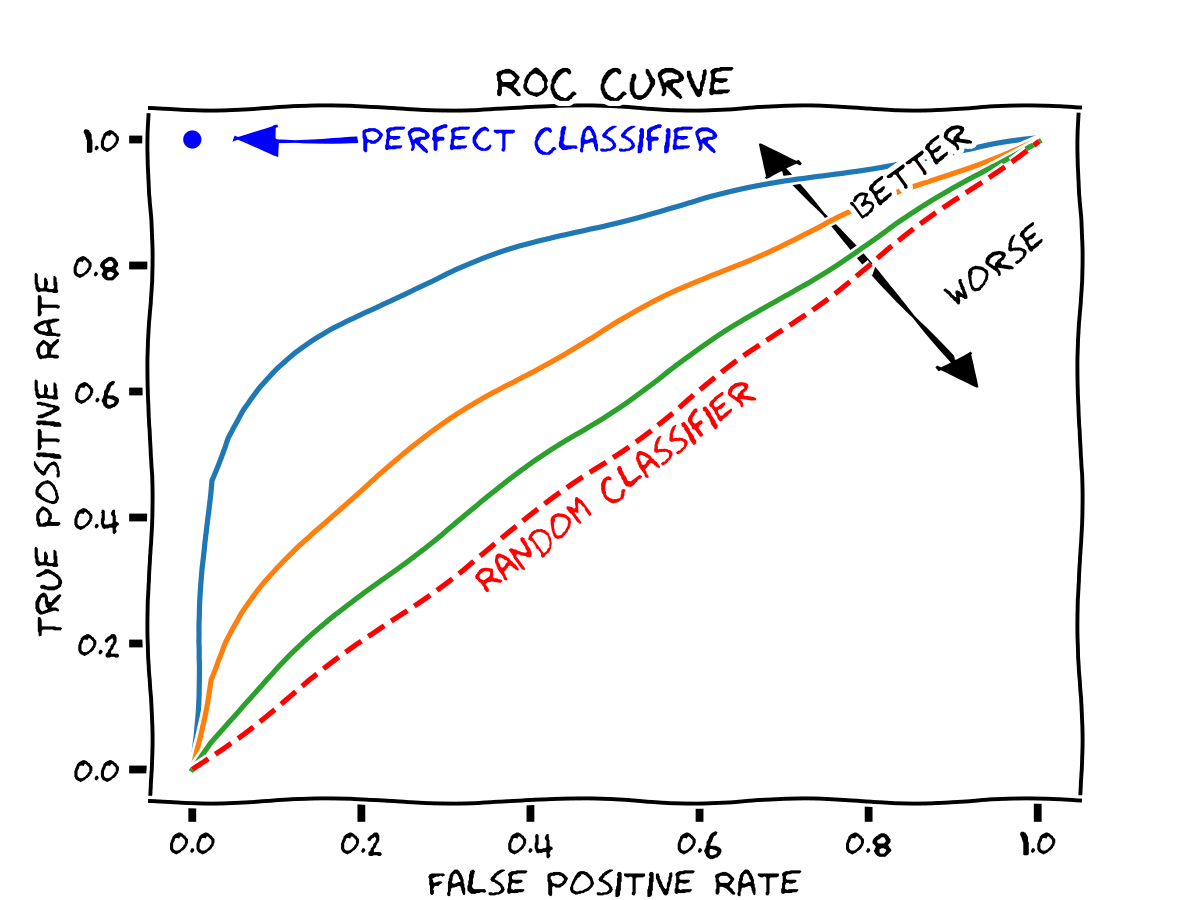

In [28]:
#konwenter #for i in "max y score"==1  y test zostawiamy
#https://stackoverflow.com/questions/42636765/how-to-set-all-the-values-of-an-existing-pandas-dataframe-to-zero
#https://www.easytweaks.com/replace-zero-values-pandas-dataframe/

# 1.przejdź po każdym rzędzie
# 2.porównaj indeks każdego z elementów w rzędzie do indeksu maksymalnej wartości w kolumnie
# 3.nadpisz wartość we właściwym indeksie wartością 1

max_Var_df=pd.DataFrame(y_score)
max_Var=max_Var_df.max(axis=1)
max_Var_Index=max_Var_df.idxmax(axis=1)
maxVar_df_copy=max_Var_df.copy()
#zerowanie maxVar_df_copy
for col in maxVar_df_copy.columns:
    maxVar_df_copy[col].values[:] = 0

#wpisywanie 1
max_Var_Index_vector_index_array=[]
y_test_vector_index_array=[]
counter=0
for i in maxVar_df_copy.index:
  maxVar_df_copy[max_Var_Index[counter]][i]=1

  max_Var_Index_vector_index_array.append(maxVar_df_copy[max_Var_Index[counter]][i])
  # import pdb breakpoint implementation
  # pdb.set_trace()
  counter+=1
counter=0
y_test_df=pd.DataFrame(y_test)
y_test_df_Index=y_test_df.idxmax(axis=1)

for i in range(0,len(y_test)):
  y_test_vector_index_array.append(y_test_df[y_test_df_Index[counter]][i]) # 3 3
  counter+=1

print(max_Var_df) #przewidziane zmienne przez algorytm w postaci % dla każdej klasy
print(max_Var.head())
#porównanie czy konwenter działa dobrze
print(max_Var_Index)
print(maxVar_df_copy) #przewidziane zmienne przez algorytm w postaci binarnej
print(max_Var_Index_vector_index_array)
print(y_test_vector_index_array)

            0         1         2         3    4    5
0    0.737491  0.000465  0.001330  0.000206  0.0  0.0
1    0.710148  0.009629  0.007268  0.000610  0.0  0.0
2    0.591651  0.000720  0.005087  0.000517  0.0  0.0
3    0.181268  0.204261  0.475292  0.017068  0.0  0.0
4    0.805401  0.002347  0.007828  0.000610  0.0  0.0
..        ...       ...       ...       ...  ...  ...
158  0.813487  0.025125  0.040431  0.015406  0.0  0.0
159  0.148928  0.249968  0.385120  0.009501  0.0  0.0
160  0.203868  0.289246  0.291016  0.025299  0.0  0.0
161  0.778114  0.005025  0.007268  0.000079  0.0  0.0
162  0.312892  0.005525  0.007268  0.000079  0.0  0.0

[163 rows x 6 columns]
0    0.737491
1    0.710148
2    0.591651
3    0.475292
4    0.805401
dtype: float64
0      0
1      0
2      0
3      2
4      0
      ..
158    0
159    2
160    2
161    0
162    0
Length: 163, dtype: int64
       0    1    2    3    4    5
0    1.0  0.0  0.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0  0.0  0.0
2    1.0  0.0  0

In [ ]:
# #heatmap confusion_matrix
# from sklearn.metrics import confusion_matrix
# label=[range(0,5)]
# X_train, X_test, y_train, y_test
# cm_2=confusion_matrix(y_test_vector_index_array,max_Var_Index_vector_index_array, labels=label)
# print(cm_2)

# import seaborn as sns
# cm_graph=sns.heatmap(cm_2,annot=True)
# plt.xlabel("predicted")
# plt.ylabel("actual")
# plt.show()

In [ ]:
# #macierz pomyłek
# #sklearn.metrics.confusion_matrix
# from sklearn.metrics import multilabel_confusion_matrix
# multilabel_confusion_matrix_example=multilabel_confusion_matrix(y_test,maxVar_df_copy)
# print(multilabel_confusion_matrix_example)
# #https://stackoverflow.com/questions/62722416/plot-confusion-matrix-for-multilabel-classifcation-python

# import plotly.express as px
# import numpy as np
# import plotly.subplots as subplots
# import plotly.figure_factory as ff
# array = np.array(multilabel_confusion_matrix_example)
# # Utworzenie listy konfiguracji dla każdej macierzy pomyłek
# cm_list = []
# for i in range(array.shape[0]):
#     cm_list.append(dict(z=array[i], type='heatmap'))

# # Połączenie macierzy pomyłek w jedną dużą macierz
# fig = subplots.make_subplots(rows=array.shape[0], cols=1, subplot_titles=['Label {}'.format(i+1) for i in range(array.shape[0])])
# for i, cm in enumerate(cm_list):
#     fig.add_trace(cm, row=i+1, col=1)
# fig.show()

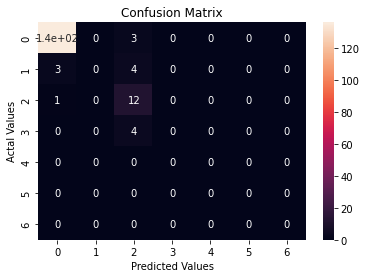

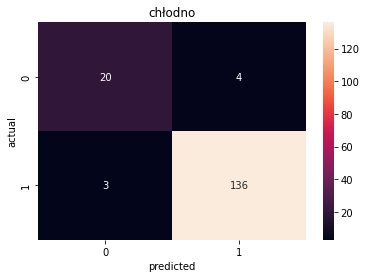

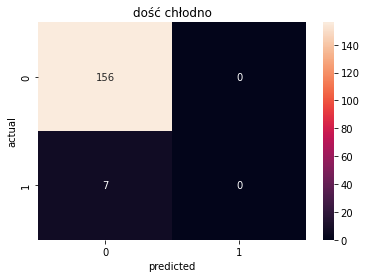

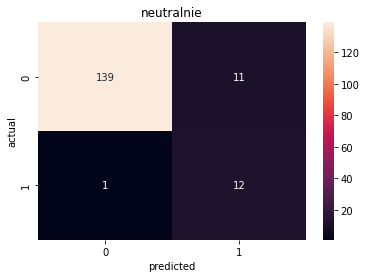

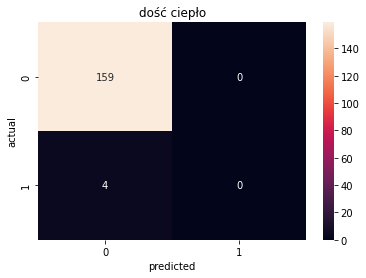

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

#tworzenie listy nazw dostępnych klas
array_names_in_numbers=encoder.classes_
array_names=[]
for i in array_names_in_numbers:
  if(i==-3):
    array_names.append("zimno")
  if(i==-2):
    array_names.append("chłodno")
  if(i==-1):
    array_names.append("dość chłodno")
  if(i==0):
    array_names.append("neutralnie")
  if(i==1):
    array_names.append("dość ciepło")
  if(i==2):
    array_names.append("ciepło")
  if(i==3):
    array_names.append("gorąco")
    
#tworzenie macierzy błędu
#multilabel_confusion_matrix_example=multilabel_confusion_matrix(y_test,maxVar_df_copy)
multilabel_confusion_matrix_example=multilabel_confusion_matrix(y_test_df_Index,max_Var_Index)
array = np.array(multilabel_confusion_matrix_example)

from sklearn.metrics import confusion_matrix
labels = [0, 1, 2, 3, 4, 5, 6]
cm = confusion_matrix(y_test_df_Index, max_Var_Index, labels=labels)
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

for i in range(len(array)):
  fig=sns.heatmap(array[i], annot=True, fmt='d')
  plt.title(array_names[i])
  plt.xlabel("predicted")
  plt.ylabel("actual")
  plt.show()
# 	-3 – zimno (cold)
# 	-2 – chłodno (cool)
# 	-1 – dość chłodno (slightly cool)
# 	0 – neutralnie (neutral)
# 	+1 – dość ciepło (slightly warm)
# 	+2 – ciepło (warm)
# 	+3 – gorąco (hot)

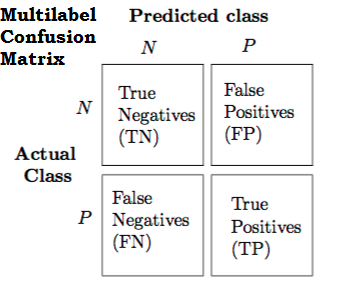

In [30]:
#data extraction
data_extraction=pd.DataFrame(data=max_Var_df)
data_extraction.columns = array_names
data_extraction

,chłodno,dość chłodno,neutralnie,dość ciepło,ciepło,gorąco
0,0.737491,0.000465,0.001330,0.000206,0.0,0.0
1,0.710148,0.009629,0.007268,0.000610,0.0,0.0
2,0.591651,0.000720,0.005087,0.000517,0.0,0.0
3,0.181268,0.204261,0.475292,0.017068,0.0,0.0
4,0.805401,0.002347,0.007828,0.000610,0.0,0.0
...,...,...,...,...,...,...
158,0.813487,0.025125,0.040431,0.015406,0.0,0.0
159,0.148928,0.249968,0.385120,0.009501,0.0,0.0
160,0.203868,0.289246,0.291016,0.025299,0.0,0.0
161,0.778114,0.005025,0.007268,0.000079,0.0,0.0


In [31]:
max_Var_Index

0      0
1      0
2      0
3      2
4      0
      ..
158    0
159    2
160    2
161    0
162    0
Length: 163, dtype: int64

In [32]:
#data extraction names vector
data_extraction_names_vector=[]
for i in max_Var_Index:
  for j in range(len(array_names)):
    if i==j:
      data_extraction_names_vector.append(array_names[j]) 
data_extraction_names_vector

['chłodno',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'chłodno',
 'neutralnie',
 'chłodno',
 'chłodno',
 'ne

In [ ]:
#notes#
#https://www.learndatasci.com/glossary/gini-impurity/
#https://www.youtube.com/watch?v=_L39rN6gz7Y
#do czego stosuje się bootstrap?
#czy bootstrap jest preferowany tutaj?
#czy można wymieszać wartości rekorów w obrębie tej samej zmiennej ale między rekordami żeby utworzyć przykładową większą bazę danych?
# czy bootstrap method działa tylko na podstawie: https://www.digitalocean.com/community/tutorials/bootstrap-sampling-in-python ?
#które zero_division wybrać 1 czy 0? w f1_score
#co oznacza dana zmienna w f1?
#stworzyć sztuczną baze danych
#

#1 metryki: dane klasy względem siebie (f1 metric, dokładność czułośc specyficzność, wnioski)
#2 film yt: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer
#3 https://www.learndatasci.com/glossary/gini-impurity/